Introduction (What we want to do and what data we are looking at):
A novel corona virus (COVID 19) was identified in 2019 in Wuhan China. It has spread rapidly worldwide and was officially declared to be a pandemic by the WHO. To better understand the data available about it, we will be doing exploratory data analysis of the available COVID 19 data. The goal of the project is to study the impact of COVID 19 across the world using Python, Pandas and Matplotlib and present visualizations to show our analysis.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import plotly.express as px

In [2]:
# File to Load 
file = "Data/owid-covid-data.csv"

# Read Purchasing File and store into Pandas data frame
data = pd.read_csv(file)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181463 entries, 0 to 181462
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    181463 non-null  object 
 1   continent                                   170857 non-null  object 
 2   location                                    181463 non-null  object 
 3   date                                        181463 non-null  object 
 4   total_cases                                 174693 non-null  float64
 5   new_cases                                   174468 non-null  float64
 6   new_cases_smoothed                          173299 non-null  float64
 7   total_deaths                                156469 non-null  float64
 8   new_deaths                                  156467 non-null  float64
 9   new_deaths_smoothed                         155320 non-null  float64
 

In [4]:
data.isnull().sum()

iso_code                                        0
continent                                   10606
location                                        0
date                                            0
total_cases                                  6770
                                            ...  
human_development_index                     35402
excess_mortality_cumulative_absolute       175234
excess_mortality_cumulative                175234
excess_mortality                           175234
excess_mortality_cumulative_per_million    175234
Length: 67, dtype: int64

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# number of countries
count_countries = data['location'].nunique()

# number of continents
count_continents = data['continent'].nunique()

print("This research includes data from ", count_countries, "countries from", count_continents, "continents.")

This research includes data from  243 countries from 6 continents.


In [7]:
# sample data, 50,000 rows of 181,463 rows
sample_data = data.sample(n=50000)
sample_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
29955,CPV,Africa,Cape Verde,2020-08-13,3073.0,73.0,48.429,33.0,0.0,0.857,...,2.1,16.5,NaN,2.1,72.98,0.665,NaN,NaN,NaN,NaN
72610,HND,North America,Honduras,2021-09-24,363017.0,1490.0,901.429,9679.0,52.0,32.429,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN
138618,SPM,North America,Saint Pierre and Miquelon,2020-07-18,4.0,0.0,0.286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.07,NaN,NaN,NaN,NaN,NaN
24272,VGB,North America,British Virgin Islands,2022-03-27,6141.0,0.0,5.286,62.0,0.0,0.000,...,NaN,NaN,NaN,NaN,79.07,NaN,NaN,NaN,NaN,NaN
108845,MNG,Asia,Mongolia,2020-12-01,791.0,7.0,21.571,NaN,NaN,NaN,...,5.5,46.5,71.180,7.0,69.87,0.737,NaN,NaN,NaN,NaN


In [59]:
# Cleaning Dataframe
# cleaning null values
data.fillna(value = 0, inplace = True)

# dropping rows that doesn't have the country name
values = ['Africa','Asia', 'Low income', 'Lower middle income', 'Upper middle income', 'World', 'International', 'Europe',
         'North America', 'European Union', 'High income', 'Oceania', 'South America']

#drop any rows that have 7 or 11 in the rebounds column
df1 = data[data.location.isin(values) == False]
df = pd.DataFrame.from_dict(df1)

# df is dataframe without actual country name
df

# drop columns
to_drop = ['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 
          'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
          'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'excess_mortality'
          , 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million'
          ]

df.drop(to_drop, inplace=True, axis=1)
df.head()
df.to_csv('Data/df.csv')

# Research questions to answer:


       # Overview

In [35]:
total_vaccinations = df.groupby('location').sum()['total_vaccinations']
total_cases = df.groupby('location').sum()['total_cases']
total_newcases = df.groupby('location').sum()['new_cases']
total_death = df.groupby('location').sum()['total_deaths']

summary_table = pd.DataFrame({"total_vaccinations":total_vaccinations,
                              "total_cases":total_cases,
                              "total_newcases":total_newcases,
                              "total_death":total_death })
summary_table

,total_vaccinations,total_cases,total_newcases,total_death
location,,,,
Afghanistan,1.358034e+08,67460253.0,178697.0,2935539.0
Albania,3.150061e+08,84582267.0,274828.0,1348626.0
Algeria,2.389461e+08,96821087.0,265767.0,2706989.0
Andorra,2.752131e+06,9925678.0,41013.0,77113.0
Angola,4.074971e+08,27219706.0,99287.0,620494.0
...,...,...,...,...
Wallis and Futuna,3.981040e+05,183019.0,454.0,2688.0
Western Sahara,0.000000e+00,0.0,0.0,0.0
Yemen,1.136148e+07,4082281.0,11819.0,828029.0


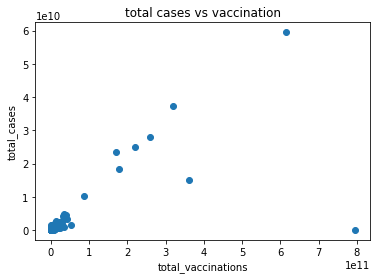

In [45]:

plt.scatter(summary_table['total_vaccinations'], summary_table['total_cases'])
plt.xlabel('total_vaccinations')
plt.ylabel('total_cases')
plt.title('total cases vs vaccination')
plt.show()


In [46]:
total_vaccinations = df.groupby('continent').sum()['total_vaccinations']
total_cases = df.groupby('continent').sum()['total_cases']
total_newcases = df.groupby('continent').sum()['new_cases']
total_death = df.groupby('continent').sum()['total_deaths']

continent_summary_table = pd.DataFrame({"total_vaccinations":total_vaccinations,
                              "total_cases":total_cases,
                              "total_newcases":total_newcases,
                              "total_death":total_death })
continent_summary_table

,total_vaccinations,total_cases,total_newcases,total_death
continent,,,,
0,1.608258e+12,1.685391e+11,775634363.0,3.054366e+09
Africa,2.338964e+10,3.783567e+09,11621944.0,9.197366e+07
Asia,1.495120e+12,3.520891e+10,147010641.0,4.814804e+08
Europe,2.648700e+11,3.742451e+10,190469058.0,6.511778e+08
North America,2.360568e+11,2.784722e+10,95865985.0,5.539454e+08
Oceania,1.323932e+10,4.981499e+08,6929000.0,1.744459e+06
South America,1.592808e+11,1.823476e+10,56497881.0,5.312110e+08


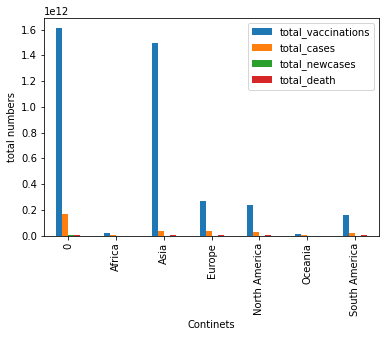

In [48]:
#counts = summary_table['Drug Regimen'].value_counts()
continent_summary_table.plot(kind="bar")
plt.xlabel("Continets")
plt.xticks(rotation=90)
plt.ylabel("total numbers")
plt.show()

GDP versus vaccines/cases 

Correlation between cases and amount of people vaccinated

Relation between rate of vaccination and mortality rate

Relation between rate of vaccination and mortality rate 

Age nd mortality rate 

Age and vaccination rate 

How effective the vaccination is in each country

New cases over time by country

Hospitalization rate by country

If people with preexisting conditions are more prone to be hospitalized or die